# Import Libraries

In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Setting Figure Size

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [12,6]

# Set Options

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# Read Data

In [4]:
# read the excel data file 
cloud_train = pd.read_csv('C:/Users/ppluc/Downloads/Dataset/train_CloudCondition.csv')

# display the top 5 rows of the dataframe
cloud_train.head()

# Note: To display more rows, example 10, use head(10)

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,rain,-13,-19.0,0.134364,17.0,68.0,4.0,1008.0,Frost,1068
1,2,Partly Cloudy,rain,15,5.0,0.847434,8.0,291.0,2.0,1036.0,Frost,1291
2,3,Partly Cloudy,rain,33,-12.0,0.763775,32.0,32.0,8.0,1004.0,Dry,1433
3,4,Partly Cloudy,snow,30,36.0,0.255069,15.0,130.0,3.0,1016.0,Dry,1410
4,5,Partly Cloudy,snow,27,30.0,0.495435,63.0,60.0,15.0,1007.0,Fog,1391


In [5]:
# read the excel data file 
cloud_test = pd.read_csv('C:/Users/ppluc/Downloads/Dataset/test_CloudCondition.csv')

# display the top 5 rows of the dataframe
cloud_test.head()

# Note: To display more rows, example 10, use head(10)

,Day,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,80002,rain,1.0,0.0,0.078150,17.0,300,10.0,1029.0,Fog,1399
1,80003,rain,-3.0,25.0,0.653251,25.0,322,0.0,1009.0,Dry,1468
2,80004,rain,18.0,17.0,0.930970,37.0,330,12.0,1045.0,Dry,1152
3,80005,rain,33.0,-12.0,0.778844,50.0,350,3.0,1022.0,Fog,1003
4,80006,rain,25.0,-19.0,0.491523,62.0,300,12.0,1042.0,Fog,1228


# Data Understanding and EDA

In [6]:
# checking shape of training dataset
cloud_train.shape

(71428, 12)

In [7]:
# checking shape of testing dataset
cloud_test.shape

(16452, 11)

In [8]:
# describing data for numerical feature of training dataset
cloud_train.describe()

,Day,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity
count,71428.000000,71425.000000,71427.000000,71426.000000,71391.000000,71408.000000,71363.000000,71428.000000
mean,37170.170451,5.550606,0.501020,31.525831,179.221793,8.014606,1022.980606,1249.736546
std,22250.741209,19.093822,0.289431,18.507098,103.729210,4.907893,13.559828,144.828721
min,1.000000,-27.000000,0.000019,0.000000,0.000000,0.000000,1000.000000,1000.000000
25%,18275.750000,-11.000000,0.249233,16.000000,89.000000,4.000000,1011.000000,1124.000000
50%,36132.500000,5.000000,0.501461,31.000000,180.000000,8.000000,1023.000000,1249.000000
75%,53989.250000,22.000000,0.751978,48.000000,269.000000,12.000000,1035.000000,1375.000000
max,80000.000000,38.000000,0.999990,63.000000,359.000000,16.000000,1046.000000,1500.000000


In [9]:
# describing dataset for categorical variable
cloud_train.describe(include = 'object')

,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Condensation
count,71428,71313,71176,71428
unique,26,2,123,4
top,Mostly Cloudy,rain,6,Mist
freq,22017,62316,1141,21685


In [10]:
# checking information of training dataset
cloud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71428 entries, 0 to 71427
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         71428 non-null  int64  
 1   Cloud_Condition             71428 non-null  object 
 2   Rain_OR_SNOW                71313 non-null  object 
 3   Temperature (C)             71176 non-null  object 
 4   Apparent Temperature (C)    71425 non-null  float64
 5   Humidity                    71427 non-null  float64
 6   Wind Speed (km/h)           71426 non-null  float64
 7   Wind Bearing (degrees)      71391 non-null  float64
 8   Visibility (km)             71408 non-null  float64
 9   Pressure (millibars)        71363 non-null  float64
 10  Condensation                71428 non-null  object 
 11  Solar irradiance intensity  71428 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 6.5+ MB


In [11]:
# checking number of unique values in training dataset
cloud_train.nunique()

Day                           71428
Cloud_Condition                  26
Rain_OR_SNOW                      2
Temperature (C)                 123
Apparent Temperature (C)         66
Humidity                      71427
Wind Speed (km/h)                64
Wind Bearing (degrees)          360
Visibility (km)                  17
Pressure (millibars)             47
Condensation                      4
Solar irradiance intensity      501
dtype: int64

In [12]:
#checking information of test dataset
cloud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16452 entries, 0 to 16451
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         16452 non-null  int64  
 1   Rain_OR_SNOW                16452 non-null  object 
 2   Temperature (C)             16452 non-null  float64
 3   Apparent Temperature (C)    16452 non-null  float64
 4   Humidity                    16452 non-null  float64
 5   Wind Speed (km/h)           16452 non-null  float64
 6   Wind Bearing (degrees)      16452 non-null  int64  
 7   Visibility (km)             16452 non-null  float64
 8   Pressure (millibars)        16452 non-null  float64
 9   Condensation                16452 non-null  object 
 10  Solar irradiance intensity  16452 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 1.4+ MB


In [13]:
cloud_train['Cloud_Condition'].value_counts()

Mostly Cloudy                          22017
Partly Cloudy                          17613
Overcast                               13612
Clear                                   9719
Foggy                                   5900
Breezy and Dry                           656
Breezy and Mostly Cloudy                 473
Breezy and Overcast                      454
Breezy and Partly Cloudy                 350
Light Rain                               214
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   63
Breezy                                    45
Windy and Overcast                        43
Dry                                       34
Breezy and Foggy                          34
Humid and Mostly Cloudy                   32
Windy and Mostly Cloudy                   32
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Humid and Overcast                         5
Drizzle                                    5
Windy     

In [14]:
# checking null values in testing dataset
cloud_test.isnull().sum()

Day                           0
Rain_OR_SNOW                  0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Condensation                  0
Solar irradiance intensity    0
dtype: int64

In [15]:
# checking number of unique values in each feature
cloud_test.nunique()

Day                           16452
Rain_OR_SNOW                      2
Temperature (C)                 164
Apparent Temperature (C)        166
Humidity                      16385
Wind Speed (km/h)               165
Wind Bearing (degrees)          360
Visibility (km)                  53
Pressure (millibars)            150
Condensation                      4
Solar irradiance intensity      501
dtype: int64

In [16]:
#checking unique value of each column in each features
# applying unique on each features
for i in cloud_train.columns:
    print(i)
    print(cloud_train[i].unique())

Day
[    1     2     3 ... 79998 79999 80000]
Cloud_Condition
['Partly Cloudy' 'Light Rain' 'Breezy and Dry' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Mostly Cloudy'
 'Humid and Partly Cloudy' 'Windy and Foggy' 'Windy and Overcast'
 'Breezy and Foggy' 'Windy and Partly Cloudy' 'Breezy'
 'Dry and Partly Cloudy' 'Windy and Mostly Cloudy'
 'Dangerously Windy and Partly Cloudy' 'Dry' 'Windy' 'Humid and Overcast'
 'Drizzle' 'Windy and Dry' 'Dry and Mostly Cloudy']
Rain_OR_SNOW
['rain' 'snow' nan]
Temperature (C)
['-13' '15' '33' '30' '27' '-17' '-5' '-14' '10' '7' '9' '20' '3' '29'
 '-8' '-15' '-20' '36' '32' '6' '17' '28' '-21' '23' '-4' '25' '-7' '16'
 '39' '-1' '13' '35' '22' '12' '14' '1' '8' '-3' '38' '5' '37' '-10' '19'
 '34' '26' '0' '24' '11' '21' '-9' '-2' '4' '-19' '-6' '2' '-16' '-11'
 '18' '31' '-18' '-12' nan '-' 16 30 17 -13 36 4 9 10 13 27 -8 -16 34 2
 -11 -9 -10 -5 39 14 7 20 -3 15 24 3

### splitting data into numerical and categorical

In [17]:
# selecting numerical variable
# selecting data_types with select_dtypes
# selecting numerical with np.number
df_num = cloud_train.select_dtypes(np.number)
df_num.columns

Index(['Day', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Solar irradiance intensity'],
      dtype='object')

In [18]:
# selecting categorical variable
# selecting data_types with select_dtypes
# selecting categorical variable with 'object'
df_cat = cloud_train.select_dtypes('object')
df_cat.columns

Index(['Cloud_Condition', 'Rain_OR_SNOW', 'Temperature (C)', 'Condensation'], dtype='object')

#### dropping unique features

In [19]:
# dropping 'Day' feature 
# 'Day' is unique value
cloud_train.drop('Day', axis=1, inplace = True)

In [20]:
# storing Days in test_day
test_day = cloud_test['Day']

In [21]:
# dropping 'Day' feature 
# 'Day' is unique value
cloud_test.drop('Day', axis=1, inplace = True)

#### changing Temperature from object to float

we can see that there is 1 values like '-' so we need to replace it by its mode value

In [22]:
# replacing '-' value with mode value
cloud_train['Temperature (C)'] = cloud_train['Temperature (C)'].replace('-', cloud_train['Temperature (C)'].mode()[0])

In [23]:
# now changing cloud_train['Temperature (C)'] into float value

cloud_train['Temperature (C)'] = cloud_train['Temperature (C)'].astype(float)

In [24]:
# checking information again for dataset
cloud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71428 entries, 0 to 71427
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cloud_Condition             71428 non-null  object 
 1   Rain_OR_SNOW                71313 non-null  object 
 2   Temperature (C)             71176 non-null  float64
 3   Apparent Temperature (C)    71425 non-null  float64
 4   Humidity                    71427 non-null  float64
 5   Wind Speed (km/h)           71426 non-null  float64
 6   Wind Bearing (degrees)      71391 non-null  float64
 7   Visibility (km)             71408 non-null  float64
 8   Pressure (millibars)        71363 non-null  float64
 9   Condensation                71428 non-null  object 
 10  Solar irradiance intensity  71428 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 6.0+ MB


# Missing Values

In [25]:
# checking missing values in the dataset
cloud_train.isnull().sum()

Cloud_Condition                 0
Rain_OR_SNOW                  115
Temperature (C)               252
Apparent Temperature (C)        3
Humidity                        1
Wind Speed (km/h)               2
Wind Bearing (degrees)         37
Visibility (km)                20
Pressure (millibars)           65
Condensation                    0
Solar irradiance intensity      0
dtype: int64

In [26]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = cloud_train.isnull().sum().sort_values(ascending = False)

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (cloud_train.isnull().sum() * 100 / cloud_train.isnull().count()).sort_values(ascending = False)

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys = ['Total','Percent of Missing Values'])

# add the column containing data type of each variable
missing_data['Type'] = cloud_train[missing_data.index].dtypes
missing_data

,Total,Percent of Missing Values,Type
Temperature (C),252,0.352803,float64
Rain_OR_SNOW,115,0.161001,object
Pressure (millibars),65,0.091001,float64
Wind Bearing (degrees),37,0.051800,float64
Visibility (km),20,0.028000,float64
Apparent Temperature (C),3,0.004200,float64
Wind Speed (km/h),2,0.002800,float64
Humidity,1,0.001400,float64
Solar irradiance intensity,0,0.000000,int64
Condensation,0,0.000000,object


we can observe that all the missing values is less than 1% so we can drop missing values

In [27]:
num_missing = missing_data[(missing_data['Total'] > 0) & (missing_data['Type'] != 'object')]
num_missing

,Total,Percent of Missing Values,Type
Temperature (C),252,0.352803,float64
Pressure (millibars),65,0.091001,float64
Wind Bearing (degrees),37,0.051800,float64
Visibility (km),20,0.028000,float64
Apparent Temperature (C),3,0.004200,float64
Wind Speed (km/h),2,0.002800,float64
Humidity,1,0.001400,float64


In [28]:
# filling null value with median of temperature
cloud_train['Temperature (C)'] = cloud_train['Temperature (C)'].fillna(cloud_train['Temperature (C)'].median())

In [29]:
# filling null value with median of pressure (milibars)
cloud_train['Pressure (millibars)'] = cloud_train['Pressure (millibars)'].fillna(cloud_train['Pressure (millibars)'].median())

In [30]:
# filling null value with median of Wind Bearin (degree)
cloud_train['Wind Bearing (degrees)'] = cloud_train['Wind Bearing (degrees)'].fillna(cloud_train['Wind Bearing (degrees)'].median())

In [31]:
# filling null value with median of Visibility (km)
cloud_train['Visibility (km)'] = cloud_train['Visibility (km)'].fillna(cloud_train['Visibility (km)'].median())

In [32]:
# filling null value with median of Apparent Temperature (C)
cloud_train['Apparent Temperature (C)'] = cloud_train['Apparent Temperature (C)'].fillna(cloud_train['Apparent Temperature (C)'].median())

In [33]:
# filling null value with median of Wind Speed (km/h)
cloud_train['Wind Speed (km/h)'] = cloud_train['Wind Speed (km/h)'].fillna(cloud_train['Wind Speed (km/h)'].median())

In [34]:
# filling null value with median of Humidity
cloud_train['Humidity'] = cloud_train['Humidity'].fillna(cloud_train['Humidity'].median())

In [35]:
# again checking for missing values for categorical variable
# after filling all the null values
cat_missing = missing_data[(missing_data['Total'] > 0) & (missing_data['Type'] == 'object')]
cat_missing

,Total,Percent of Missing Values,Type
Rain_OR_SNOW,115,0.161001,object


In [36]:
# filling null value with mode of Rain_OR_SNOW
cloud_train['Rain_OR_SNOW'] = cloud_train['Rain_OR_SNOW'].fillna(cloud_train['Rain_OR_SNOW'].mode()[0])

after dropping missing values just checking missing values again

In [37]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = cloud_train.isnull().sum().sort_values(ascending = False)

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (cloud_train.isnull().sum() * 100 / cloud_train.isnull().count()).sort_values(ascending = False)

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys = ['Total','Percent of Missing Values'])
missing_data

,Total,Percent of Missing Values
Solar irradiance intensity,0,0.0
Condensation,0,0.0
Pressure (millibars),0,0.0
Visibility (km),0,0.0
Wind Bearing (degrees),0,0.0
Wind Speed (km/h),0,0.0
Humidity,0,0.0
Apparent Temperature (C),0,0.0
Temperature (C),0,0.0
Rain_OR_SNOW,0,0.0


we can see that we dont have any missing values there 

In [38]:
# checking unique values count for target variale 
cloud_train['Cloud_Condition'].value_counts()

Mostly Cloudy                          22017
Partly Cloudy                          17613
Overcast                               13612
Clear                                   9719
Foggy                                   5900
Breezy and Dry                           656
Breezy and Mostly Cloudy                 473
Breezy and Overcast                      454
Breezy and Partly Cloudy                 350
Light Rain                               214
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   63
Breezy                                    45
Windy and Overcast                        43
Dry                                       34
Breezy and Foggy                          34
Humid and Mostly Cloudy                   32
Windy and Mostly Cloudy                   32
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Humid and Overcast                         5
Drizzle                                    5
Windy     

# Visualization 


## Univariate

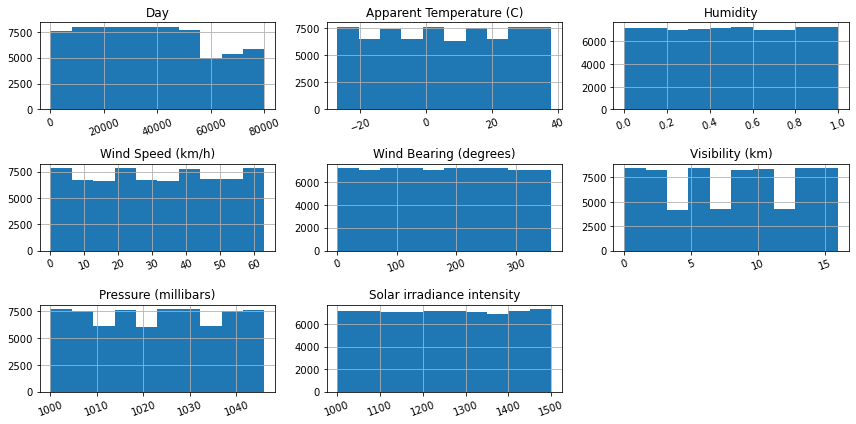

In [39]:
# plotting a pairplot for numerical values
df_num.hist(xrot=20, )

plt.tight_layout()

plt.show()

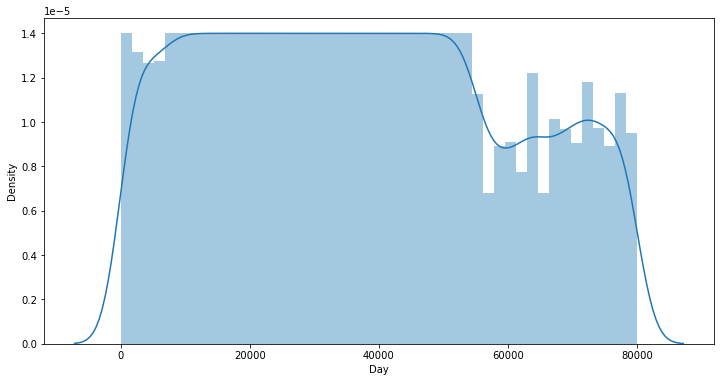

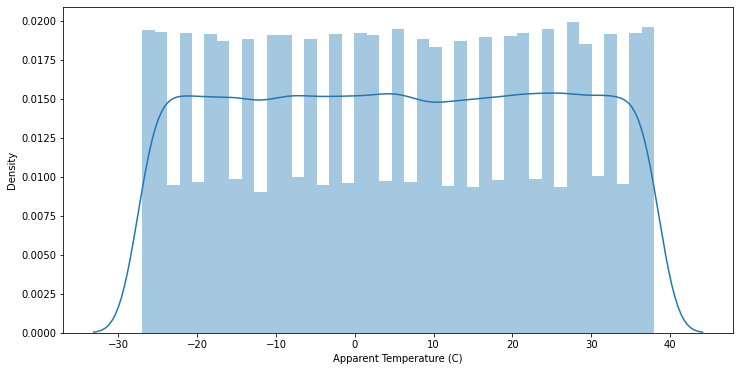

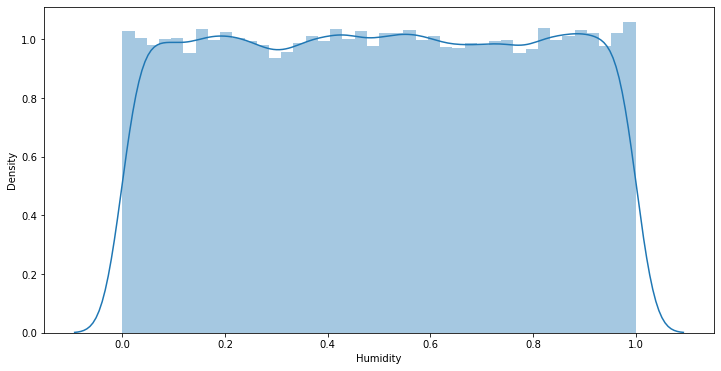

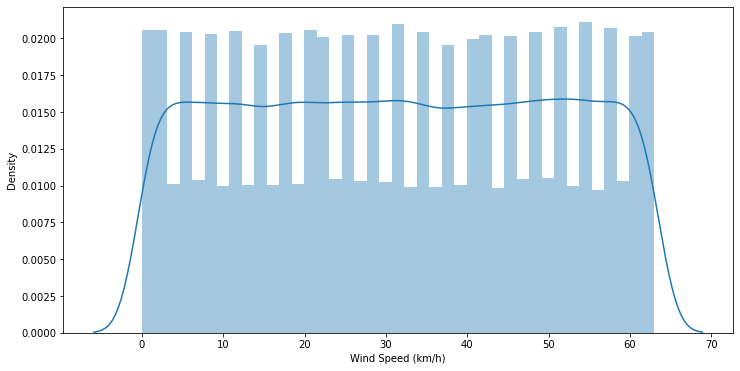

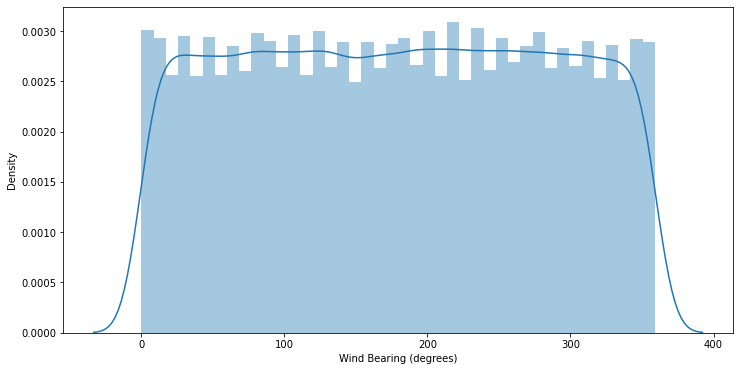

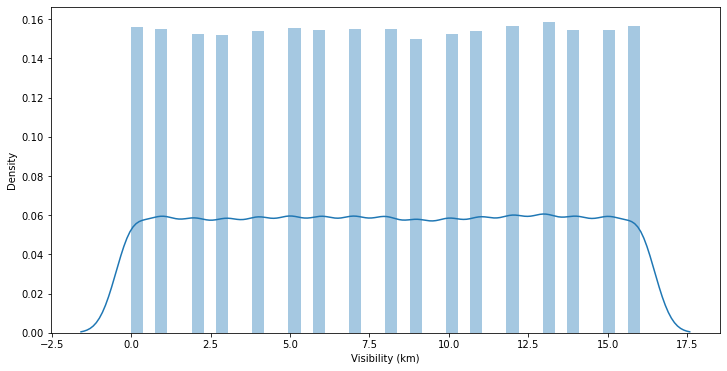

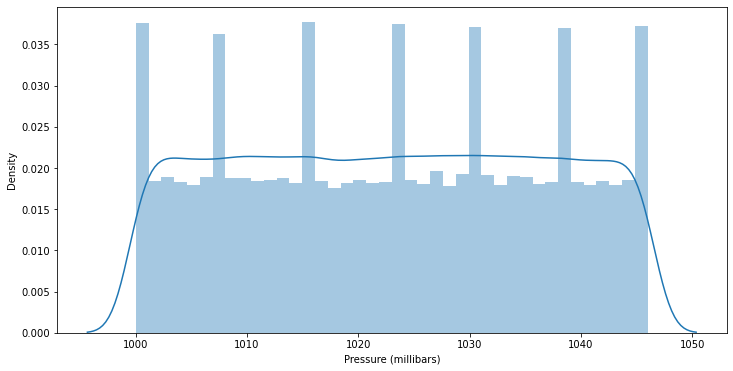

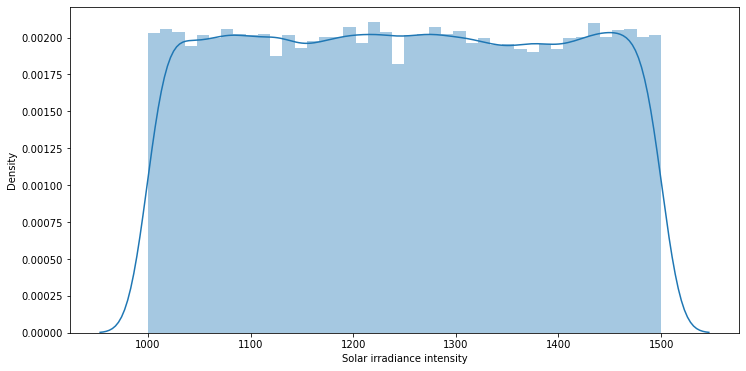

In [40]:
for i in df_num.columns:
    sns.distplot(df_num[i], hist= True)
    plt.show()

##### all the numeric features is normally distributed 

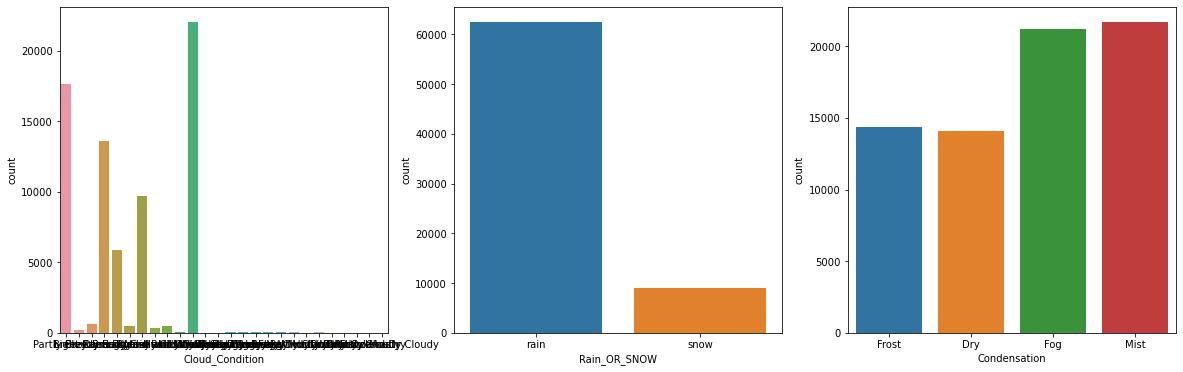

In [41]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in cloud_train:

    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(cloud_train[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(1, 3, figsize = (20,6))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(cloud_train[variable], ax = subplot)
    
# display the plot
plt.show()

<AxesSubplot:xlabel='count', ylabel='Cloud_Condition'>

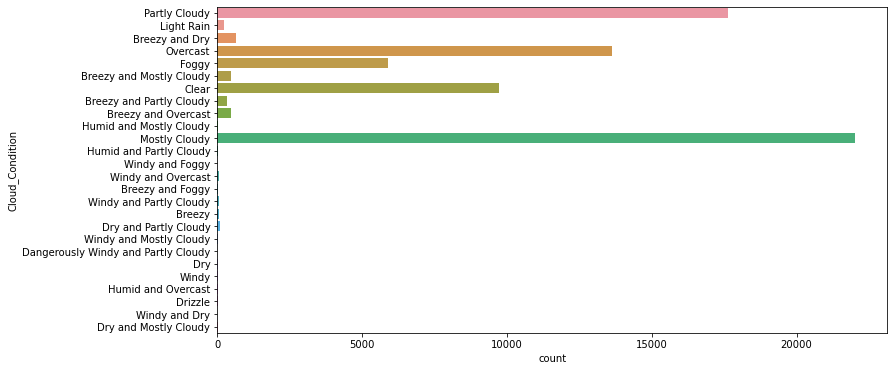

In [42]:
sns.countplot(y= cloud_train['Cloud_Condition'])

<AxesSubplot:xlabel='Solar irradiance intensity', ylabel='Density'>

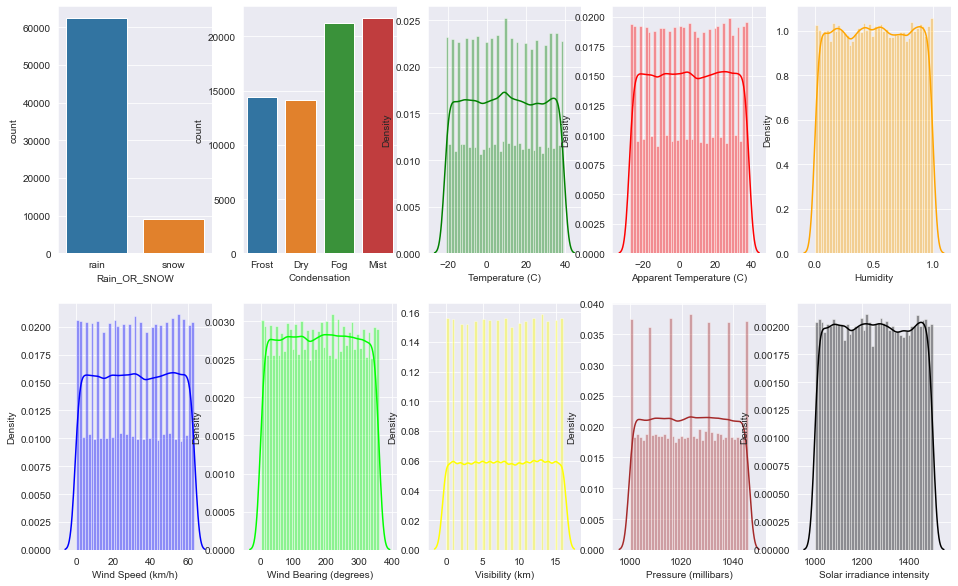

In [43]:
#checking Normality
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 5, figsize=(16, 10))
sns.countplot('Rain_OR_SNOW',data=cloud_train,ax=axes[0,0]) # plotting for Rain_OR_SNOW count
sns.countplot('Condensation',data=cloud_train,ax=axes[0,1]) # plotting for Condensation count
sns.distplot(cloud_train['Temperature (C)'], kde=True,color='green',ax=axes[0,2]) # checking for the distribution of Temperature (C)
sns.distplot(cloud_train['Apparent Temperature (C)'].dropna(),kde=True,color='red',ax=axes[0,3]) # checking for the distribution of Apparent Temperature (C)
sns.distplot(cloud_train['Humidity'].dropna(),kde=True,color='orange',ax=axes[0,4]) # checking for the distribution of Humidity
sns.distplot(cloud_train['Wind Speed (km/h)'].dropna(),kde=True,color='blue',ax=axes[1,0]) # checking for the distribution of Wind Speed (km/h)
sns.distplot(cloud_train['Wind Bearing (degrees)'].dropna(),kde=True,color='lime',ax=axes[1,1]) # checking for the distribution of Wind Bearing (degrees)
sns.distplot(cloud_train['Visibility (km)'].dropna(),kde=True,color='yellow',ax=axes[1,2]) # checking for the distribution of Visibility (km)
sns.distplot(cloud_train['Pressure (millibars)'].dropna(),kde=True,color='brown',ax=axes[1,3]) # checking for the distribution of Pressure (millibars)
sns.distplot(cloud_train['Solar irradiance intensity'].dropna(),kde=True,color='black',ax=axes[1,4]) # checking for the distribution of Solar irradiance intensity

<AxesSubplot:xlabel='Rain_OR_SNOW', ylabel='count'>

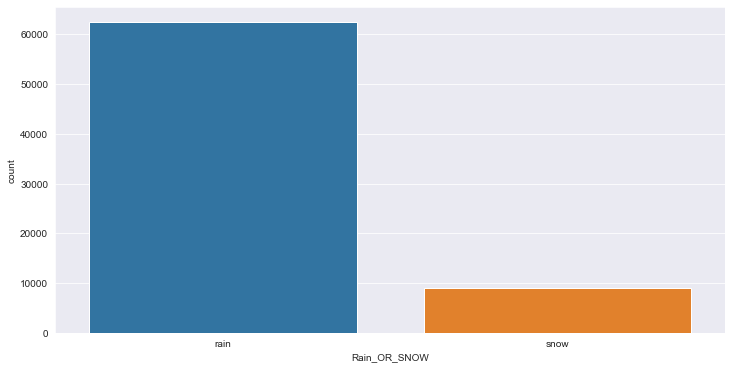

In [44]:
sns.countplot(cloud_train['Rain_OR_SNOW'])

# bivariate 

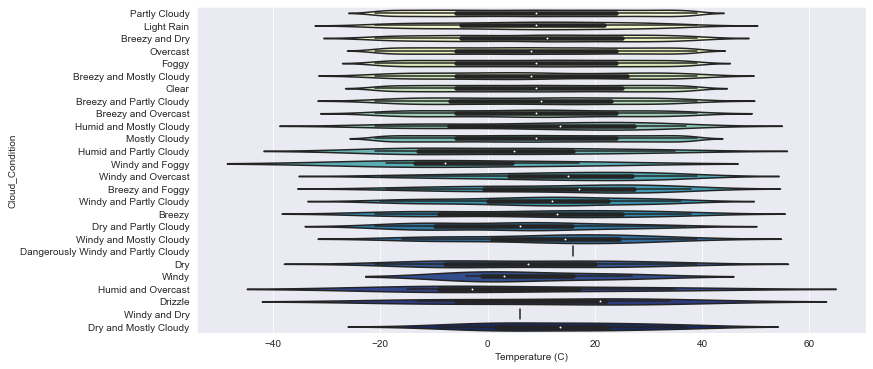

In [45]:
sns.violinplot(x="Temperature (C)", y="Cloud_Condition", data=cloud_train, palette="YlGnBu", figsize = (10,15))
plt.show()

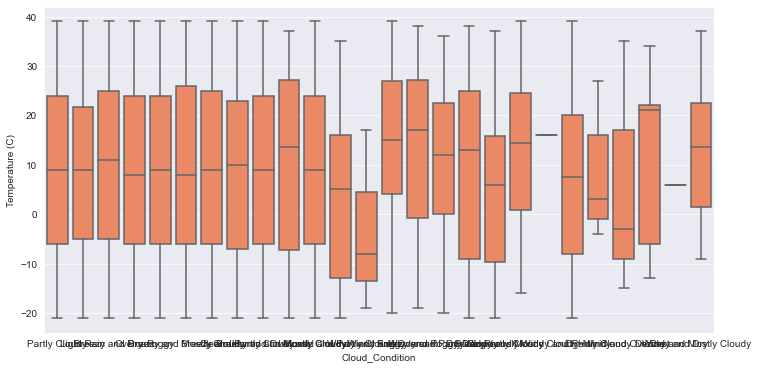

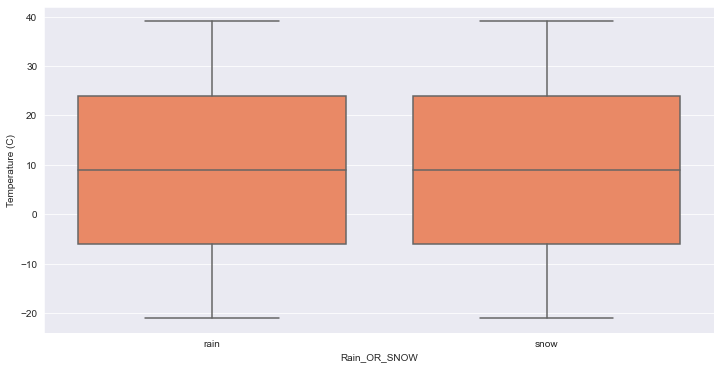

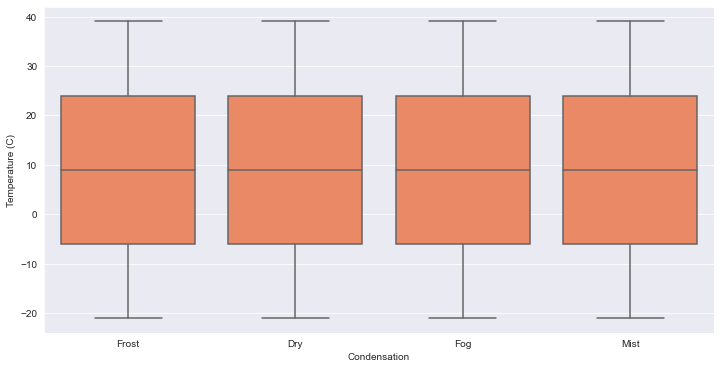

In [46]:
for i in ['Cloud_Condition','Rain_OR_SNOW','Condensation']:
    sns.boxplot(x = df_cat[i], y = cloud_train['Temperature (C)'], color = 'coral')
    plt.show()

### missing values visualization

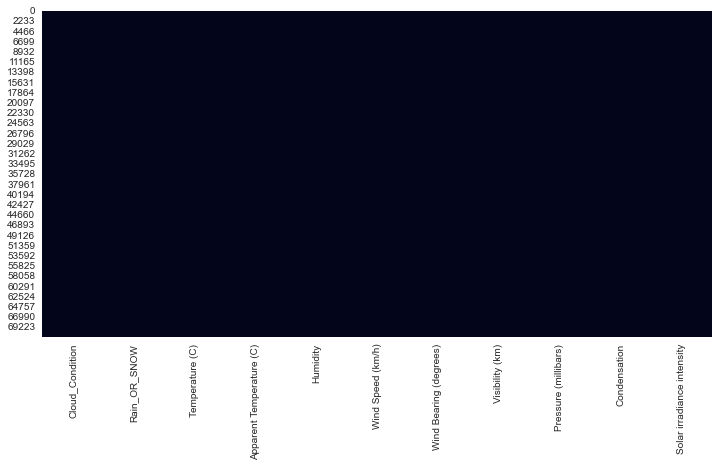

In [47]:
# checking missing values by heatmap
sns.heatmap(cloud_train.isnull(), cbar=False)
plt.show()

# Correlation

In [48]:
corr = cloud_train.corr()
corr

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity
Temperature (C),1.000000,0.001110,0.004359,0.003482,0.000370,-0.003734,-0.004944,-0.001439
Apparent Temperature (C),0.001110,1.000000,0.004179,-0.005651,-0.003501,-0.002458,0.001793,0.003820
Humidity,0.004359,0.004179,1.000000,-0.001844,-0.002763,0.003480,0.006410,0.002272
Wind Speed (km/h),0.003482,-0.005651,-0.001844,1.000000,-0.002833,0.000325,0.002156,-0.005051
Wind Bearing (degrees),0.000370,-0.003501,-0.002763,-0.002833,1.000000,-0.000384,0.001172,-0.008265
Visibility (km),-0.003734,-0.002458,0.003480,0.000325,-0.000384,1.000000,-0.002862,0.002704
Pressure (millibars),-0.004944,0.001793,0.006410,0.002156,0.001172,-0.002862,1.000000,-0.005583
Solar irradiance intensity,-0.001439,0.003820,0.002272,-0.005051,-0.008265,0.002704,-0.005583,1.000000


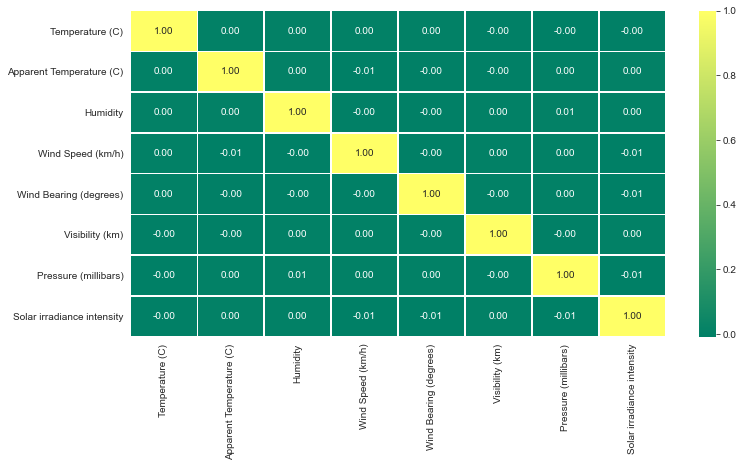

In [49]:
sns.heatmap(corr, annot = True, linewidths=.5, fmt= '.2f', cmap ='summer')
plt.show()

In [50]:
cloud_train.corr().style.background_gradient(cmap='coolwarm')

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity
Temperature (C),1.000000,0.001110,0.004359,0.003482,0.000370,-0.003734,-0.004944,-0.001439
Apparent Temperature (C),0.001110,1.000000,0.004179,-0.005651,-0.003501,-0.002458,0.001793,0.003820
Humidity,0.004359,0.004179,1.000000,-0.001844,-0.002763,0.003480,0.006410,0.002272
Wind Speed (km/h),0.003482,-0.005651,-0.001844,1.000000,-0.002833,0.000325,0.002156,-0.005051
Wind Bearing (degrees),0.000370,-0.003501,-0.002763,-0.002833,1.000000,-0.000384,0.001172,-0.008265
Visibility (km),-0.003734,-0.002458,0.003480,0.000325,-0.000384,1.000000,-0.002862,0.002704
Pressure (millibars),-0.004944,0.001793,0.006410,0.002156,0.001172,-0.002862,1.000000,-0.005583
Solar irradiance intensity,-0.001439,0.003820,0.002272,-0.005051,-0.008265,0.002704,-0.005583,1.000000


In [51]:
cloud_train.head()

,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,Partly Cloudy,rain,-13.0,-19.0,0.134364,17.0,68.0,4.0,1008.0,Frost,1068
1,Partly Cloudy,rain,15.0,5.0,0.847434,8.0,291.0,2.0,1036.0,Frost,1291
2,Partly Cloudy,rain,33.0,-12.0,0.763775,32.0,32.0,8.0,1004.0,Dry,1433
3,Partly Cloudy,snow,30.0,36.0,0.255069,15.0,130.0,3.0,1016.0,Dry,1410
4,Partly Cloudy,snow,27.0,30.0,0.495435,63.0,60.0,15.0,1007.0,Fog,1391


# applying label Encoder on Target Variable

In [52]:
# importing LabelEncoder algorithm from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# calling the function
le = LabelEncoder()

# fitting and transforming classes of target variable
cloud_train['Cloud_Condition'] = le.fit_transform(cloud_train['Cloud_Condition'])

In [53]:
# print 5 values of cloud_train
cloud_train.head()

,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,19,rain,-13.0,-19.0,0.134364,17.0,68.0,4.0,1008.0,Frost,1068
1,19,rain,15.0,5.0,0.847434,8.0,291.0,2.0,1036.0,Frost,1291
2,19,rain,33.0,-12.0,0.763775,32.0,32.0,8.0,1004.0,Dry,1433
3,19,snow,30.0,36.0,0.255069,15.0,130.0,3.0,1016.0,Dry,1410
4,19,snow,27.0,30.0,0.495435,63.0,60.0,15.0,1007.0,Fog,1391


### separating into numeric and categoric features

In [54]:
# selecting numerical variable
# selecting data_types with select_dtypes
# selecting numerical with np.number
df_num = cloud_train.select_dtypes(np.number)
df_num.columns

Index(['Cloud_Condition', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)',
       'Solar irradiance intensity'],
      dtype='object')

In [55]:
# selecting categorical variable
# selecting data_types with select_dtypes
# selecting categorical variable with 'object'
df_cat = cloud_train.select_dtypes('object')
df_cat.columns

Index(['Rain_OR_SNOW', 'Condensation'], dtype='object')

In [56]:
# selecting numerical variable
# selecting data_types with select_dtypes
# selecting numerical with np.number
df_num_test = cloud_test.select_dtypes(np.number)
df_num_test.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Solar irradiance intensity'],
      dtype='object')

In [57]:
# selecting categorical variable
# selecting data_types with select_dtypes
# selecting categorical variable with 'object'
df_cat_test = cloud_test.select_dtypes('object')
df_cat_test.columns

Index(['Rain_OR_SNOW', 'Condensation'], dtype='object')

### applying dummy variable  for categorical value

In [58]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variable = pd.get_dummies(df_cat, drop_first=True)

In [59]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded = pd.get_dummies(df_cat_test, drop_first=True)

In [60]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_num, dummy_encoded_variable], axis=1)

# display data with dummy variables
df_dummy.head()

,Cloud_Condition,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity,Rain_OR_SNOW_snow,Condensation_Fog,Condensation_Frost,Condensation_Mist
0,19,-13.0,-19.0,0.134364,17.0,68.0,4.0,1008.0,1068,0,0,1,0
1,19,15.0,5.0,0.847434,8.0,291.0,2.0,1036.0,1291,0,0,1,0
2,19,33.0,-12.0,0.763775,32.0,32.0,8.0,1004.0,1433,0,0,0,0
3,19,30.0,36.0,0.255069,15.0,130.0,3.0,1016.0,1410,1,0,0,0
4,19,27.0,30.0,0.495435,63.0,60.0,15.0,1007.0,1391,1,1,0,0


In [61]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy_test = pd.concat([df_num_test, dummy_encoded], axis=1)

# display data with dummy variables
df_dummy_test.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity,Rain_OR_SNOW_snow,Condensation_Fog,Condensation_Frost,Condensation_Mist
0,1.0,0.0,0.078150,17.0,300,10.0,1029.0,1399,0,1,0,0
1,-3.0,25.0,0.653251,25.0,322,0.0,1009.0,1468,0,0,0,0
2,18.0,17.0,0.930970,37.0,330,12.0,1045.0,1152,0,0,0,0
3,33.0,-12.0,0.778844,50.0,350,3.0,1022.0,1003,0,1,0,0
4,25.0,-19.0,0.491523,62.0,300,12.0,1042.0,1228,0,1,0,0


In [62]:
df_dummy_test.shape

(16452, 12)

In [63]:
# checking shape of dummy dataframe
df_dummy.shape

(71428, 13)

In [64]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop('Cloud_Condition', axis = 1)

# storing columns of X in X_col
X_col = X.columns

# extract the target variable from the data set
y = df_dummy['Cloud_Condition']

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (49999, 13)
The shape of X_test is: (21429, 13)
The shape of y_train is: (49999,)
The shape of y_test is: (21429,)


In [65]:
# add the intercept column using 'add_constant()'
df_dummy_test = sm.add_constant(df_dummy_test)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X_test1 = df_dummy_test

# storing columns of X in X_col
X_col1 = X_test1.columns



# print dimension of predictors test set
print("The shape of X_test is:",X_test1.shape)

The shape of X_test is: (16452, 13)


In [66]:
# importing RepeatedEditedNearestNeighbours algorithm from imblearn.under_sampling
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

# calling RepeatedEditedNearestNeighbours
# giving sampling_strategy = 'not majority'
ros = RepeatedEditedNearestNeighbours(sampling_strategy= 'not majority')

# fitting data for undersampling
X_resampled, y_resampled = ros.fit_resample(X, y)

In [67]:
# of examples for each class
print(sorted(Counter(y_resampled).items()))

[(6, 23), (12, 3), (17, 22017), (18, 107), (19, 240)]


In [68]:
# count function will give total number of observation
y_resampled.count()

22390

In [69]:
# splitting the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 1)

# Normalizing the dataset  (to give equal importance to each attribute(Independent Variable))

In [70]:
# importing a algorithm from sklearn.preprocessing library
from sklearn.preprocessing import StandardScaler

# calling StandardScaler() algorithm
sc = StandardScaler()

# fit_transform will transform X_train into standardise values
X_train = sc.fit_transform(X_train)

# fit_transform will transform X_test into standardise values
X_test =sc.transform(X_test) 

In [71]:
# creating dataframe with X_train giving columns = X_col
X_train = pd.DataFrame(X_train, columns = X_col)

# creating dataframe with X_test giving columns = X_col
X_test = pd.DataFrame(X_test, columns = X_col)

# printing top 5 rows of dataframe
X_train.head()

,const,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity,Rain_OR_SNOW_snow,Condensation_Fog,Condensation_Frost,Condensation_Mist
0,0.0,0.797215,-1.005141,-1.216412,0.021400,0.739723,-1.634415,0.072212,-1.242493,-0.266285,-0.651296,2.005389,-0.668381
1,0.0,-0.111037,0.141812,0.718071,-0.304323,-0.309844,1.427848,-1.258050,0.227806,-0.266285,-0.651296,2.005389,-0.668381
2,0.0,0.456621,0.611020,-0.918253,-0.032887,1.394498,0.611245,1.254667,0.545336,-0.266285,1.535399,-0.498656,-0.668381
3,0.0,-1.189588,-1.422215,0.246721,-0.467185,-1.417185,1.427848,1.624184,-1.615245,-0.266285,-0.651296,-0.498656,1.496153
4,0.0,-1.416651,-0.431665,1.009476,1.432868,-0.964620,-0.613661,1.032957,-0.055209,-0.266285,-0.651296,-0.498656,1.496153


In [72]:
# importing a algorithm from sklearn.preprocessing library
from sklearn.preprocessing import StandardScaler

# calling StandardScaler algorithm
sc = StandardScaler()

# again fitting and transforming of testing dataset values
X_test1 =sc.fit_transform(X_test1)
 

In [73]:
# creating dataframe for testing dataset
X_test1 = pd.DataFrame(X_test1, columns = X_col1)

# printing top 5 values of dataframe
X_test1.head()

,const,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity,Rain_OR_SNOW_snow,Condensation_Fog,Condensation_Frost,Condensation_Mist
0,0.0,-0.453351,-0.299780,-1.467177,-0.781400,1.152358,0.394708,0.439667,1.025201,-0.348967,1.531203,-0.508496,-0.654502
1,0.0,-0.681447,1.009660,0.535791,-0.350214,1.363083,-1.639449,-1.047373,1.501644,-0.348967,-0.653081,-0.508496,-0.654502
2,0.0,0.516054,0.590639,1.503033,0.296563,1.439710,0.801540,1.629299,-0.680328,-0.348967,-0.653081,-0.508496,-0.654502
3,0.0,1.371412,-0.928312,0.973209,0.997239,1.631278,-1.029202,-0.080797,-1.709170,-0.348967,1.531203,-0.508496,-0.654502
4,0.0,0.915221,-1.294955,-0.027478,1.644017,1.152358,0.801540,1.406243,-0.155550,-0.348967,1.531203,-0.508496,-0.654502


# Creating models 

### creating function for appending all the model accuracy in 1 frame

In [74]:
cols = ['Model Name', 'Accuracy Score']

result_tabulation = pd.DataFrame(columns = cols)

def accuracy(model_name):
    
    global result_tabulation
    
    matrix = pd.Series({'Model Name': str(model_name), 
                       'Accuracy Score': metrics.accuracy_score(y_test, y_pred) * 100})
    
    result_tabulation = result_tabulation.append(matrix, ignore_index = True)
    return result_tabulation

## Random Forest Classifier

In [75]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

In [76]:
metrics.accuracy_score(y_test, y_pred)

0.08396605627512282

In [77]:
accuracy('Naive_Bayes')

,Model Name,Accuracy Score
0,Naive_Bayes,8.396606


## Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

In [79]:
metrics.accuracy_score(y_test, y_pred)

0.9843680214381421

In [80]:
accuracy('Random_Forest')

,Model Name,Accuracy Score
0,Naive_Bayes,8.396606
1,Random_Forest,98.436802


## AdaBoost Classifier

In [81]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

abc.fit(X_train, y_train)

y_pred = abc.predict(X_test)

In [82]:
metrics.accuracy_score(y_test, y_pred)

0.9843680214381421

In [83]:
accuracy('AdaBoost_Classifier')

,Model Name,Accuracy Score
0,Naive_Bayes,8.396606
1,Random_Forest,98.436802
2,AdaBoost_Classifier,98.436802


## Logistic Regression

In [84]:
LR = LogisticRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

In [85]:
metrics.accuracy_score(y_test, y_pred)

0.9843680214381421

In [86]:
accuracy('Logistic_Regression')

,Model Name,Accuracy Score
0,Naive_Bayes,8.396606
1,Random_Forest,98.436802
2,AdaBoost_Classifier,98.436802
3,Logistic_Regression,98.436802


## ExtraTrees Classifier

In [87]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()

etc.fit(X_train, y_train)

y_pred = etc.predict(X_test)

In [88]:
metrics.accuracy_score(y_test, y_pred)

0.9843680214381421

In [89]:
accuracy('ExtraTrees_Classifier')

,Model Name,Accuracy Score
0,Naive_Bayes,8.396606
1,Random_Forest,98.436802
2,AdaBoost_Classifier,98.436802
3,Logistic_Regression,98.436802
4,ExtraTrees_Classifier,98.436802


## One Vs Rest Classifier with Random Forest

In [90]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(estimator=rf)

ovr.fit(X_train, y_train)

y_pred = ovr.predict(X_test)

In [91]:
metrics.accuracy_score(y_test, y_pred)

0.9843680214381421

In [92]:
accuracy('RandomForest_with_OVR')

,Model Name,Accuracy Score
0,Naive_Bayes,8.396606
1,Random_Forest,98.436802
2,AdaBoost_Classifier,98.436802
3,Logistic_Regression,98.436802
4,ExtraTrees_Classifier,98.436802
5,RandomForest_with_OVR,98.436802


## One Vs Rest Classifier with Extra Trees

In [93]:
#from sklearn.multiclass import OneVsRestClassifier

#ovr = OneVsRestClassifier(estimator=etc)

#ovr.fit(X_train, y_train)

y_pred = ovr.predict(X_test)

In [94]:
metrics.accuracy_score(y_test, y_pred)

0.9843680214381421

In [95]:
accuracy('Extratrees_with_OVR')

,Model Name,Accuracy Score
0,Naive_Bayes,8.396606
1,Random_Forest,98.436802
2,AdaBoost_Classifier,98.436802
3,Logistic_Regression,98.436802
4,ExtraTrees_Classifier,98.436802
5,RandomForest_with_OVR,98.436802
6,Extratrees_with_OVR,98.436802


## Bagging Classifier

In [96]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

In [97]:
metrics.accuracy_score(y_test, y_pred)

0.9843680214381421

In [98]:
accuracy('Bagging_Classifier')

,Model Name,Accuracy Score
0,Naive_Bayes,8.396606
1,Random_Forest,98.436802
2,AdaBoost_Classifier,98.436802
3,Logistic_Regression,98.436802
4,ExtraTrees_Classifier,98.436802
5,RandomForest_with_OVR,98.436802
6,Extratrees_with_OVR,98.436802
7,Bagging_Classifier,98.436802


## Gradient Boosting Classifier

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

In [100]:
metrics.accuracy_score(y_test, y_pred)

0.9816882536846807

In [101]:
accuracy('Gradient_Boosting_Classifire')

,Model Name,Accuracy Score
0,Naive_Bayes,8.396606
1,Random_Forest,98.436802
2,AdaBoost_Classifier,98.436802
3,Logistic_Regression,98.436802
4,ExtraTrees_Classifier,98.436802
5,RandomForest_with_OVR,98.436802
6,Extratrees_with_OVR,98.436802
7,Bagging_Classifier,98.436802
8,Gradient_Boosting_Classifire,98.168825


## KNN Classifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier

hgb = KNeighborsClassifier()
hgb.fit(X_train, y_train)
y_pred = hgb.predict(X_test)

In [103]:
metrics.accuracy_score(y_test, y_pred)

0.9841447074586869

In [104]:
accuracy('KNN_Classifier')

,Model Name,Accuracy Score
0,Naive_Bayes,8.396606
1,Random_Forest,98.436802
2,AdaBoost_Classifier,98.436802
3,Logistic_Regression,98.436802
4,ExtraTrees_Classifier,98.436802
5,RandomForest_with_OVR,98.436802
6,Extratrees_with_OVR,98.436802
7,Bagging_Classifier,98.436802
8,Gradient_Boosting_Classifire,98.168825
9,KNN_Classifier,98.414471


## SVC Classifier

In [105]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

In [106]:
metrics.accuracy_score(y_test, y_pred)

0.9843680214381421

In [107]:
accuracy('SVC_Classifier')

,Model Name,Accuracy Score
0,Naive_Bayes,8.396606
1,Random_Forest,98.436802
2,AdaBoost_Classifier,98.436802
3,Logistic_Regression,98.436802
4,ExtraTrees_Classifier,98.436802
5,RandomForest_with_OVR,98.436802
6,Extratrees_with_OVR,98.436802
7,Bagging_Classifier,98.436802
8,Gradient_Boosting_Classifire,98.168825
9,KNN_Classifier,98.414471


## One Vs Rest with AdaBoost Classifier

In [108]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(estimator=abc)

ovr.fit(X_train, y_train)

y_pred = ovr.predict(X_test)

In [109]:
metrics.accuracy_score(y_test, y_pred)

0.9839213934792318

In [110]:
accuracy('AdaBoost_with_OVR')

,Model Name,Accuracy Score
0,Naive_Bayes,8.396606
1,Random_Forest,98.436802
2,AdaBoost_Classifier,98.436802
3,Logistic_Regression,98.436802
4,ExtraTrees_Classifier,98.436802
5,RandomForest_with_OVR,98.436802
6,Extratrees_with_OVR,98.436802
7,Bagging_Classifier,98.436802
8,Gradient_Boosting_Classifire,98.168825
9,KNN_Classifier,98.414471


# Again Performing on test Data

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test1)

In [111]:
# printing y_pred
y_pred

# Performing inverse transform of Label Encoder

In [112]:
# list of label encoder classes
list(le.classes_)

In [113]:
# transforming all the classes here
le.transform(['Breezy',
 'Breezy and Dry',
 'Breezy and Foggy',
 'Breezy and Mostly Cloudy',
 'Breezy and Overcast',
 'Breezy and Partly Cloudy',
 'Clear',
 'Dangerously Windy and Partly Cloudy',
 'Drizzle',
 'Dry',
 'Dry and Mostly Cloudy',
 'Dry and Partly Cloudy',
 'Foggy',
 'Humid and Mostly Cloudy',
 'Humid and Overcast',
 'Humid and Partly Cloudy',
 'Light Rain',
 'Mostly Cloudy',
 'Overcast',
 'Partly Cloudy',
 'Windy',
 'Windy and Dry',
 'Windy and Foggy',
 'Windy and Mostly Cloudy',
 'Windy and Overcast',
 'Windy and Partly Cloudy'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [114]:
# creating 1 variable named var
# concating the day of test dataset and predicted values 
var = pd.concat([test_day, pd.DataFrame(list(le.inverse_transform(y_pred)))],axis=1)

# giving columns = Day and Cloud_Condition
var.columns=['Day','Cloud_Condition']

In [115]:
# checking top 5 rows of var
var.head()

In [116]:
# exporting dataset to computer memory
hack_result1 = var.to_csv('C:\\Users\\ppluc\\Downloads\\Dataset\\Pratik_Parate.csv')